<a href="https://colab.research.google.com/github/SaintBrava/MODELS/blob/master/Predict_House_Nums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io

In [0]:
from keras import backend as K
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Input, MaxPooling2D, Conv2D, ReLU,LeakyReLU,Flatten,Dropout,BatchNormalization

In [0]:
xfiles =  scipy.io.loadmat('/content/drive/My Drive/DATA/train_32x32.mat')

In [0]:
def get_X_y(filer,n,batch_size): # n - позиция курсора в датасете с которого и отсчитываем батч, batch_size - размер батча
  new_img = []
  img = filer['X'][:,:,:,n*batch_size:(n+1)*batch_size] # получаем батч изображений с shape = [size,size,3,batch]

  for i in range(img.shape[3]): new_img.append(img[:,:,:,i])  # записываем батч изображений с shape = [size,size,3,batch]
                                                              # в лист для того, чтобы получить массив с shape = [batch,size,size,3]
  y = filer['y'][n*batch_size:(n+1)*batch_size]
  return np.array(new_img),y

In [0]:
X,y = get_X_y(xfiles,0,1000)

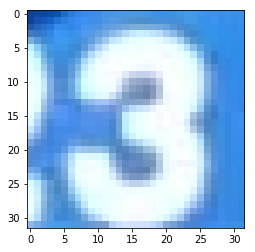

In [10]:
imgplot = plt.imshow(X[3])
plt.show()

In [11]:
y[3] # проверяем соотвествие данных и лейблов

array([3], dtype=uint8)

**модель для классификации**

In [0]:
def build_classifier_model(input_shape):
    model=Sequential()
    
    model.add(Conv2D(filters = 128,kernel_size = [3,3],strides = (1,1),padding = 'same', use_bias=True,input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2)) # LeakyReLU вместо ReLU для того чтобы нейроны сети не затухали, Это может остановить обучение из-за маленького количества обучаемых параметров
    model.add(MaxPooling2D((2,2))) # droput не нужен на этом блоке, т.к количество нейронов окажется слишком мало относительно входной информации и сеть перестанет обучаться
    # model.add(Dropout(0.3)) 
    
    model.add(Conv2D(filters = 128,kernel_size = [5,5],strides = (1,1),padding = 'same', use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2)) # LeakyReLU вместо ReLU для того чтобы нейроны сети не затухали, Это может остановить обучение из-за маленького количества обучаемых параметров
    model.add(MaxPooling2D((2,2))) # droput не нужен на этом блоке, т.к количество нейронов окажется слишком мало относительно входной информации и сеть перестанет обучаться
    # model.add(Dropout(0.3))
    

    model.add(Conv2D(filters = 128,kernel_size = [7,7],strides = (1,1),padding = 'same', use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))


    model.add(Conv2D(filters = 128,kernel_size = [7,7],strides = (1,1),padding = 'same', use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    # model.add(Dropout(0.3))
   
    model.add(Flatten())

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Dense(11,activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [0]:
K.clear_session() # очищаем сессию

In [0]:
Classifier = build_classifier_model((32,32,3))

In [62]:
Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)      

**модель для регрессии**

In [0]:
def build_regression_model(input_shape):
    model=Sequential()
    
    model.add(Conv2D(filters = 64,kernel_size = [3,3],strides = (1,1),padding = 'same', use_bias=True,input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2)) # droput не нужен на этом блоке, т.к количество нейронов окажется слишком мало относительно входной информации и сеть перестанет обучаться
    # model.add(Dropout(0.3))
    
    model.add(Conv2D(filters = 64,kernel_size = [3,3],strides = (1,1),padding = 'same', use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2)) # droput не нужен на этом блоке, т.к количество нейронов окажется слишком мало относительно входной информации и сеть перестанет обучаться
    # model.add(Dropout(0.3))
    

    model.add(Conv2D(filters = 64,kernel_size = [5,5],strides = (1,1),padding = 'same', use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64,kernel_size = [5,5],strides = (1,1),padding = 'same', use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64,kernel_size = [3,3],strides = (1,1),padding = 'same', use_bias=True))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    # model.add(Dropout(0.3))
   
    model.add(Flatten())
    
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1,activation='linear'))

    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

    return model

**создаем лейблы для классификатора**

In [0]:
def labels_for_classificatio(n):
  batch_of_labels = []
  for i in n:
    label = np.zeros([11])
    label[i] = 1
    batch_of_labels.append(label)
  return np.array(batch_of_labels)

**обучающая функция**

In [0]:
def train(model,ff,epochs,batch_size,classification = True):
  for epoch in range(epochs):
    print('Epoch',epoch,'------------------------------------------')
    for iterr in range(int(ff['X'].shape[3]/batch_size)):
      X,y = get_X_y(ff,iterr,batch_size)
      if classification == True: y = labels_for_classificatio(y)
      loss = Classifier.train_on_batch(X,y)
      print('iteration',iterr,' loss :',loss[0],'accuracy :',loss[1])

In [0]:
# Classifier.save('classifier.h5') # сохраняем модель

In [18]:
train(Classifier,xfiles,10,256,classification = True)

Epoch 0 ------------------------------------------
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
iteration 0  loss : 2.5366075 accuracy : 0.0859375
iteration 1  loss : 2.616838 accuracy : 0.109375
iteration 2  loss : 2.6146479 accuracy : 0.14453125
iteration 3  loss : 2.555294 accuracy : 0.10546875
iteration 4  loss : 2.3840022 accuracy : 0.14453125
iteration 5  loss : 2.355033 accuracy : 0.12109375
iteration 6  loss : 2.4315848 accuracy : 0.1484375
iteration 7  loss : 2.399402 accuracy : 0.1328125
iteration 8  loss : 2.4253511 accuracy : 0.15234375
iteration 9  loss : 2.3633096 accuracy : 0.12890625
iteration 10  loss : 2.3328085 accuracy : 0.13671875
iteration 11  loss : 2.3152251 accuracy : 0.1953125
iteration 12  loss : 2.3212116 accuracy : 0.16796875
iteration 13  loss : 2.3620796 accuracy : 0.140625
iteration 14  loss : 2.3725271 accuracy : 0.1640625
iteration 15  loss : 2.293231 accuracy : 0.1796875
iteration 16  loss : 2.30303 acc

**Calculation Acc on test sets**

In [0]:
testfiles =  scipy.io.loadmat('/content/drive/My Drive/DATA/test_32x32.mat') # читаем содержимое файла

In [0]:
# создаем генератор для того чтобы воспользоваться методом evaluate_generator(),т.к тестовая выборка слишком большая
def test_files_generator(tf,batch_size):
  for i in range(int(tf['X'].shape[3]/batch_size)):
    X,y = get_X_y(tf,i,batch_size)
    y = labels_for_classificatio(y) # получаем лейблы для классификации
    yield (X,y)

In [0]:
score=Classifier.evaluate_generator(test_files_generator(testfiles,128),steps = 128,verbose=2)

**Results: Accuracy on test data**

In [59]:
print('loss',score[0],'accuracy',score[1])

loss 0.29034309048438445 accuracy 0.916015625
